# 파이썬으로 구현하는 텍스트 분석(자연어 처리)

-----

### 1. koNLPy를 활용한 형태소 분석
### 2. 워드 클라우드
### 3. 한국어 기반의 자연어 처리 모듈 - nltk
### 4. 텍스트 전처리
### 5. 카운트 기반의 단어 표현
### 6. 한글 자모 분해와 결합

## *KoNLPy : 한국어 정보처리를 위한 파이썬 패키지 (https://konlpy.org/ko/latest/)

## 1. koNLPy를 활용한 형태소 분석

In [6]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
import pandas as pd
import numpy as np 

In [7]:
kkma = Kkma()

In [8]:
pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [9]:
pprint(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))


['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [10]:
pprint(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


### [형태소 분석기 비교]

In [11]:
sample = '이것은 형태소 분석기 입니다 아버지가방에들어가신다'

In [12]:
from konlpy.tag import Hannanum  
hannanum = Hannanum() 
pprint(hannanum.nouns(sample))
pprint(hannanum.morphs(sample))
pprint(hannanum.pos(sample))

['이것', '형태소', '분석기', '아버지가방에들어가']
['이것', '은', '형태소', '분석기', '일', 'ㅂ니다', '아버지가방에들어가', '이', '시ㄴ다']
[('이것', 'N'),
 ('은', 'J'),
 ('형태소', 'N'),
 ('분석기', 'N'),
 ('일', 'P'),
 ('ㅂ니다', 'E'),
 ('아버지가방에들어가', 'N'),
 ('이', 'J'),
 ('시ㄴ다', 'E')]


In [13]:
kkma = Kkma() 
pprint(kkma.nouns(sample))
pprint(kkma.morphs(sample))
pprint(kkma.pos(sample))

['이것', '형태소', '분석기', '아버지', '아버지가방', '가방']
['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]


In [14]:
from konlpy.tag import Okt                                  ## 다른 형태소를 클래스를 가져온다. 
okt = Okt()
pprint(okt.nouns(sample))
pprint(okt.morphs(sample))
pprint(okt.pos(sample))

['것', '형태소', '분석', '기', '아버지', '가방']
['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가방', '에', '들어가신다']
[('이', 'Determiner'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기', 'Noun'),
 ('입니다', 'Adjective'),
 ('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]


In [15]:
from konlpy.tag import Komoran                    ## 다른 형태소 분석을 하는 클래스를 사용한다 
komoran = Komoran()
pprint(komoran.nouns(sample))
pprint(komoran.morphs(sample))
pprint(komoran.pos(sample))

['형태소', '분석기', '아버지', '가방']
['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNP'),
 ('분석기', 'NNG'),
 ('이', 'VV'),
 ('ㅂ니다', 'EC'),
 ('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]


In [16]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [17]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [18]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [19]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [20]:
tagsets = pd.DataFrame()                            ## 빈 데이터프레임을 만든다. 
N = 67

                                                   ##  한글 형태소 분서기에 있는 품사에 대한 정보를 데이터프레임에 넣는다. 
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))

In [21]:
display(tagsets.head(N))

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


## 2. 워드 클라우드

In [22]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [23]:
from wordcloud import WordCloud             ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt 

In [24]:
myfontpath = "data/THEdog.ttf" 

In [25]:
wordcloud = WordCloud(                        ## 워드클라우드 객체를 만들때 한글로 출력되도록 객체를 만든다 
    font_path = myfontpath,
    width = 200,
    height = 200
)

In [26]:
text = "둘리 도우너 또치 마이콜 희동이 둘리 둘리 도우너 또치 토토로 둘리"

In [27]:
wordcloud = wordcloud.generate(text)
wordcloud.to_file('ptest1.png')

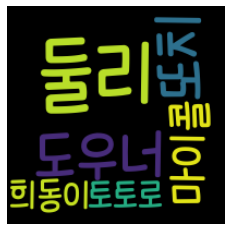

In [28]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')               ## 워드 클라우드 이미지로 출력한다 
plt.axis('off')
plt.show()

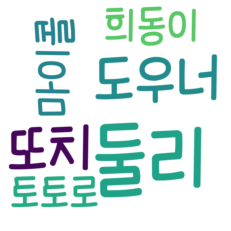

In [29]:
wordcloud = WordCloud(
    font_path = myfontpath,
    background_color='white',                     ## 배경색을 지정한다 
    width = 800,
    height = 800
)
wordcloud_ = wordcloud.generate(text)
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

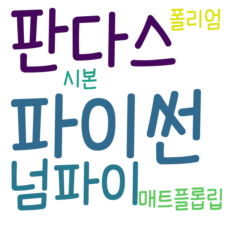

In [30]:
keywords = {'파이썬':7, '넘파이':3, '판다스':5, '매트플롭립':2, '시본':2, '폴리엄':2}             ## 특정 단어의 빈도를 딕셔너리로 만든다 

wordcloud = wordcloud.generate_from_frequencies(keywords)        ## 빈도별로 워드클라우드를 만든다 

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
from PIL import Image                                ## 이미지 파일을 처리하는 모듈을 사용한다. 

In [32]:
r2d2_mask = np.array(Image.open('data/r2d2.JPG'))       ## 이미지를 읽어와서 다차원 배열로 변환한다 

In [33]:
from wordcloud import STOPWORDS  

In [34]:
stopwords = set()                               ## 한글은 별도로 집합으로 불용어를 만든다 
stopwords.add("은")
stopwords.add("입니다")
stopwords.add("것인가")
stopwords.add("처럼")

wordcloud = WordCloud( stopwords=stopwords,              ## 워드 클라우드 객체를 만든다 
                          font_path = myfontpath,
                          background_color='white',
                           width = 800,
                           height = 800,
                          mask=r2d2_mask)            ## 마스크 인자에 이미지를 전달한다 

In [35]:
texts = ['로봇 처럼 표시하는 것을 보기 위해 이것 은 예문 입니다 가을이라 겨울 바람 솔솔 불어오니 ',
         '여러분 의 문장을 넣 으세요 ㅎㅎㅎ 스타워즈 영화에 나오는 다양한 로봇처럼 r2d2']

In [36]:
wordcloud = wordcloud.generate_from_text(texts[0]+texts[1])    ## 두 개의 문자을 연결해서 워드클라우드를 만든다 
wordcloud

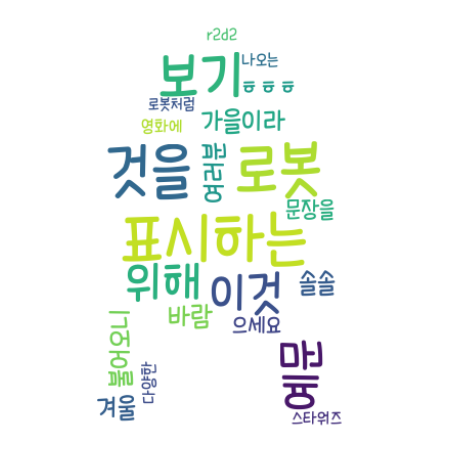

In [37]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")         ## 이미지를 출력하면 전달된 모양에 따라 표시한다 
plt.axis("off")
plt.show()

## 3. 한국어 기반의 자연어 처리 모듈 : nltk

In [38]:
import nltk                     ## 한국어 자연어처리 모듈 : pip install nltk

In [39]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()

In [40]:
files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [41]:
doc_ko = kobill.open('1809898.txt').read()         ## 특정 텍스트 파일을 읽어온다 

In [42]:
t = Okt()
tokens_ko = t.nouns(doc_ko)                ## 텍스트에서 명사를 추출한다. 
print(tokens_ko[:10])

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']


In [43]:
ko_ = nltk.Text(tokens_ko, name='국군부대의 소말리아 해역 파견연장 동의안')       ## 명사로 추출한 것을 텍스트 객체로 만든다 

In [44]:
type(ko_)

nltk.text.Text

In [45]:
len(ko_.tokens)                         ##  명사로 분리된 개수를 확인한다 

640

In [46]:
len(set(ko_.tokens))                   ## 유일한 단어의 개수를 확인한다 

249

In [47]:
ko_.tokens[:10]

['국군', '부대', '소말리아', '해역', '파견', '연장', '의안', '의안', '제출', '연월일']

In [48]:
ko_.vocab()                    ## 동일한 단어의 발생 빈도를 확인한다. 

FreqDist({'파견': 31, '부대': 24, '소말리아': 18, '연장': 14, '국군': 13, '해역': 12, '의안': 11, '우리': 9, '유엔': 9, '척': 9, ...})

In [49]:
import matplotlib.pyplot as plt

In [50]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

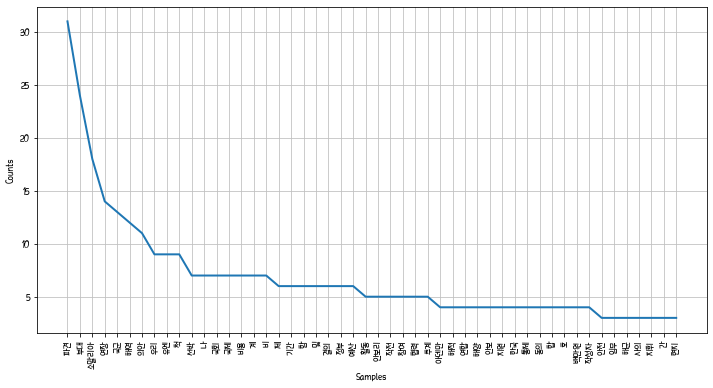

In [51]:
plt.figure(figsize=(12,6))
ko_.plot(50)                         ## 단어별로 발생빈도에 맞도록 그래프를 그린다. 

In [52]:
ko_.count('파견')                  ## 특정 단어의 발생빈도를 확인한다. 

31

In [53]:
ko_.count('소말리아')

18

In [54]:
ko_.concordance('소말리아')             ## 특정 단어가 있는 곳은 단어를 확인한다. 

Displaying 18 of 18 matches:
국군 부대 소말리아 해역 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 
 파견 연장 의안 의안 제출 연월일 번호 제 자 정 부 제안 이유 소말리아 아덴만 해역 파견 국군 부대 청해부대 의 파견 기간 종료 예정 다
부대 의 파견 기간 종료 예정 다음 이유 파견 기간 연장 함 첫째 소말리아 해적 활동 우리 선박 안전 위협 둘째 청해부대 성공 임무 수행 우
여 국내외 관계 기관 파견 연장 요청 내용 유엔 안보리 결의 근거 소말리아 아덴만 해역 파견 국군 부대 파견 기간 장함 나 국군 부대 임무 
심의 과정 반영 추진 합 의 기획재정부 외교통상부 합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파
합의 국군 부대 소말리아 해역 파견 연장 의안 헌법 제 항의 규정 소말리아 아덴만 해역 파견 국군 부대 파견 기간 연장 동의 국군 부대 파견
 방지 및 지원 차단 위 협력 국 협력 촉구 유엔 안보리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 
리 결의 호 소말리아 과도정부 출범 이후 무 정부 상태 지속 부터 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 
 소말리아 해역 해적 활동 급증 선박 피랍 척 척 척 척 척 유엔 소말리아 해적 퇴치 위해 회원 국 군함 및 항공기 참여 요청 유엔 안보리 
 합동 실 사단 파견 바레인 지부티 유엔 외국 정부 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해
 및 지역 기구 소말리아 영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리
영해 진입 연장 유엔안보리 결의 호 유엔 소말리아 해적 퇴치 위해 소말리아 내 모든 조치 취할 수 승인 유엔 안보리 결의 호 파견 의안 국회
회 가결 부대 파견 파견 연장 의안 국회 가결 국무회의 국군 부대 소말리아 해역 파견 연장 의안 

In [55]:
data = ko_.vocab().most_common(150)                 ## 가장 많이 발생한 단어를 선택한다. 

In [56]:
data

[('파견', 31),
 ('부대', 24),
 ('소말리아', 18),
 ('연장', 14),
 ('국군', 13),
 ('해역', 12),
 ('의안', 11),
 ('우리', 9),
 ('유엔', 9),
 ('척', 9),
 ('선박', 7),
 ('나', 7),
 ('국회', 7),
 ('국제', 7),
 ('비용', 7),
 ('계', 7),
 ('비', 7),
 ('제', 6),
 ('기간', 6),
 ('함', 6),
 ('및', 6),
 ('결의', 6),
 ('정부', 6),
 ('예산', 6),
 ('활동', 5),
 ('안보리', 5),
 ('작전', 5),
 ('참여', 5),
 ('협력', 5),
 ('추계', 5),
 ('아덴만', 4),
 ('해적', 4),
 ('연합', 4),
 ('해양', 4),
 ('안보', 4),
 ('지원', 4),
 ('한국', 4),
 ('통제', 4),
 ('동의', 4),
 ('합', 4),
 ('호', 4),
 ('백만원', 4),
 ('작성자', 4),
 ('안전', 3),
 ('임무', 3),
 ('해군', 3),
 ('사의', 3),
 ('지휘', 3),
 ('간', 3),
 ('현지', 3),
 ('조치', 3),
 ('심의', 3),
 ('테러', 3),
 ('위', 3),
 ('이후', 3),
 ('위해', 3),
 ('수', 3),
 ('계획', 3),
 ('단위', 3),
 ('연', 3),
 ('구', 3),
 ('분', 3),
 ('국방부', 3),
 ('평화', 3),
 ('재원', 3),
 ('이유', 2),
 ('청해부대', 2),
 ('의', 2),
 ('예정', 2),
 ('요청', 2),
 ('근거', 2),
 ('보유', 2),
 ('호송', 2),
 ('운용', 2),
 ('경우', 2),
 ('사령관', 2),
 ('전술', 2),
 ('경비', 2),
 ('부담', 2),
 ('사항', 2),
 ('헌법', 2),
 ('항', 2),
 ('후', 2),
 ('예산

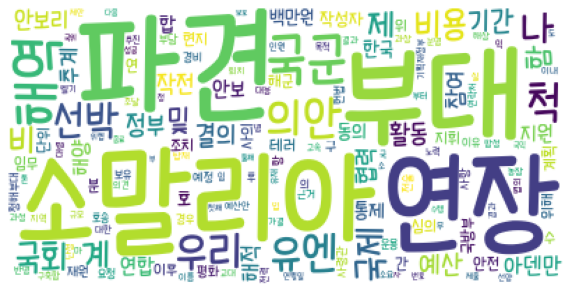

In [57]:
wordcloud = WordCloud(font_path=myfontpath,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

## 4. 텍스트 전처리

### ** 한국어 전처리 패키지 : PyKoSpacing & Py-Hanspell **
#### 전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지이다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있다.

##### pip install git+https://github.com/haven-jeon/PyKoSpacing.git
##### pip install git+https://github.com/ssut/py-hanspell.git

In [58]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [59]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [60]:
from pykospacing import spacing

kospacing_sent = spacing(new_sent)
print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [61]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [62]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) 

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


### **Bag of Words(BoW) 만들기**
#### Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법이다.

In [4]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  
print(token)
word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']
{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
token

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
token = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다"]
corpus = token
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_)

## 5. 카운트 기반의 단어 표현

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [ ]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print(vocab)

In [ ]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  '저는 사과 좋아요',
  '저는 바나나 좋아요',
  '저는 바나나 좋아요 저는 바나나 좋아요'
]
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [ ]:
print(cos_sim(dtm[0], dtm[1])) #문서1과 문서2의 코사인 유사도
print(cos_sim(dtm[0], dtm[2])) #문서1과 문서3의 코사인 유사도
print(cos_sim(dtm[1], dtm[2])) #문서2과 문서3의 코사인 유사도

## 5. 한글 자모 분해와 결합

In [ ]:
import hgtk                      ## 한글의 자음과 모음을 분리하는 모듈을 사용한다 

### 한글 자모 분해, 조합(오토마타), 조사 붙이기, 초/중/종 분해조합, 한글/한자/영문 여부 체크 등을 지원합니다.

In [ ]:
hgtk.letter.decompose('감')          ## 특정 글자를 분리하면 초성 중성 종성으로 분리된다 

In [ ]:
hgtk.letter.compose('ㄱ', 'ㅏ', 'ㅁ')      ## 분리된 글자를 하나의 글자로 합친다. 

In [ ]:
sample_text = '''타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다.
공식어로 지정된 인도의 주요 언어 중에서 타밀어와 계통적으로 가장 가까운 것은 말라얄람어인데, 
9세기 무렵까지 말라얄람어는 타밀어의 방언이었다.
이 두 언어 간에는 선사 시대에 일어난 서부 방언(말라얄람어의 원형) 분열의 증거가 되는 많은 차이가 있지만, 
13~14세기 무렵까지도 두 언어는 완전히 서로 다른 언어로 분리되지 않은 채였다.'''

In [ ]:
s = hgtk.text.decompose(sample_text)        ## 여러 문장에 대해 단어를 분리한다. 

In [ ]:
s[:40]

In [ ]:
hgtk.text.compose(s)[:40]                     ## 분리된 것을 하나로 합친다. 

In [ ]:
hgtk.checker.is_hangul('한글입니다')           ## 한글 여부를 확인한다 

In [ ]:
hgtk.checker.is_hangul('no한글입니다')         ## 일부 영어가 들어가면 한글로 인식하지 않는다 

In [ ]:
hgtk.checker.is_hangul('it is english')

In [ ]:
hgtk.checker.is_hanja('大韓民國')                  ## 한자도 확인할 수 있다. 

In [ ]:
hgtk.checker.is_hanja('大한민국')

In [ ]:
hgtk.checker.is_hanja('대한민국')

## Josa
EUN_NEUN - 은/는

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN)                 ## 단어에 맞는 조사를 붙여볼 수 있다. 

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUL_REUL)